In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [5]:
# Download VADER if not already
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarthak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# === Step 1: Load Filtered CSVs ===
business_df = pd.read_csv("filtered_business_data.csv")
reviews_df = pd.read_csv("filtered_reviews_data.csv")

In [9]:
# === Step 2: Merge Business and Review Data ===
df = pd.merge(reviews_df, business_df, on='business_id', how='inner')

In [11]:
# Optional cleanup or renaming
df.rename(columns={
    'text': 'review_text',
    'stars_x': 'review_stars',
    'stars_y': 'business_stars'
}, inplace=True)

# Drop nulls if needed
df.dropna(subset=['review_text'], inplace=True)

In [13]:
# Add review length column
df['review_length'] = df['review_text'].apply(len)

print("Merged DataFrame shape:", df.shape)
df.head()

Merged DataFrame shape: (1817429, 25)


,review_id,user_id,business_id,review_stars,useful,funny,cool,review_text,date,city_x,...,state,postal_code,latitude,longitude,business_stars,review_count,is_open,attributes,categories,hours
0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,tucson,...,AZ,85713.0,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
1,oUrKJzj_qZybqqPatE9q1A,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2,1,0,0,Let me start by saying the service is AWESOME!...,2015-09-10 02:41:13,tucson,...,AZ,85713.0,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
2,E21dO10aI0pXCuoDNeSY6A,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,5,0,0,0,Went here for the first time for the dinner bu...,2017-08-18 01:42:46,tucson,...,AZ,85713.0,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
3,7pn3auavTDZyDKlAAku1Og,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,5,0,0,0,This is my 1st experience here at Kettle. The...,2015-09-26 16:13:09,tucson,...,AZ,85713.0,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
4,Izs72sMY0cCXtHs5exObZw,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,3,3,0,0,"Located on the west side of Starr Pass Blvd, K...",2015-06-22 16:08:27,tucson,...,AZ,85713.0,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN


In [15]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply to each review
df['vader_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])


In [17]:
df[['review_text', 'review_stars', 'vader_score']].sample(10)


,review_text,review_stars,vader_score
1183014,This place is amazing! Definitely recommend th...,5,0.9704
815277,I love this little gem. I've been a few times...,5,0.8381
140579,My boyfriend and I came to Ybor city and stumb...,5,0.9890
1165088,Great food great atmosphere. I love the wonton...,5,0.9823
1116316,First off this place is in historical Ybor Cit...,5,0.9939
786214,Love this place!! Great food and fast service!...,5,0.9368
1323839,This is a review about the tour. For $20 we go...,3,0.8977
1606075,This place is amazing! The food is amazing and...,5,0.9531
125785,Oysters are great!!!\nSushi is good too!\nServ...,5,0.9569
42693,"Years ago, I lived in diners. I spent many a-n...",4,0.9949


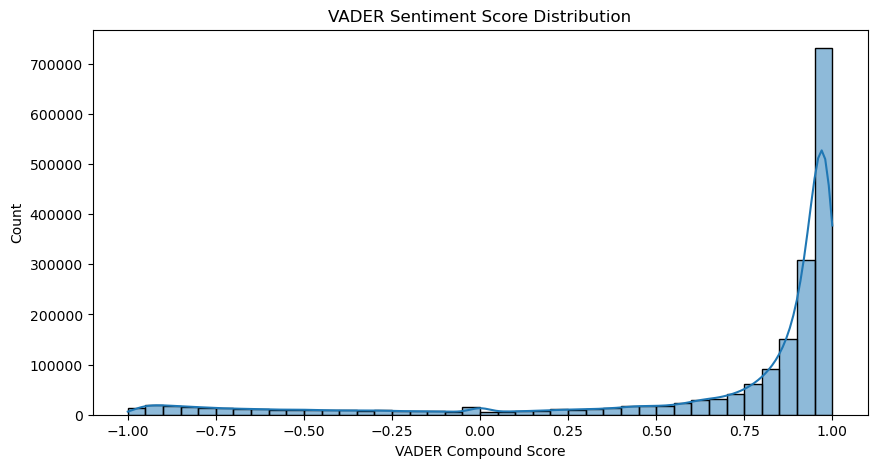

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['vader_score'], kde=True, bins=40)
plt.title("VADER Sentiment Score Distribution")
plt.xlabel("VADER Compound Score")
plt.show()


In [21]:
correlation = df['vader_score'].corr(df['review_stars'])
print(f"Correlation between VADER score and Yelp rating: {correlation:.4f}")


Correlation between VADER score and Yelp rating: 0.6183


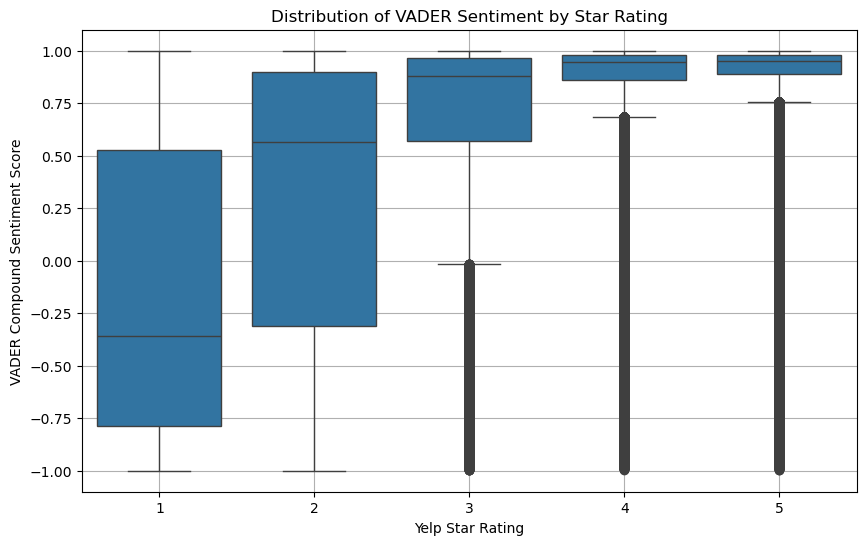

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='review_stars', y='vader_score')
plt.title("Distribution of VADER Sentiment by Star Rating")
plt.xlabel("Yelp Star Rating")
plt.ylabel("VADER Compound Sentiment Score")
plt.grid(True)
plt.show()


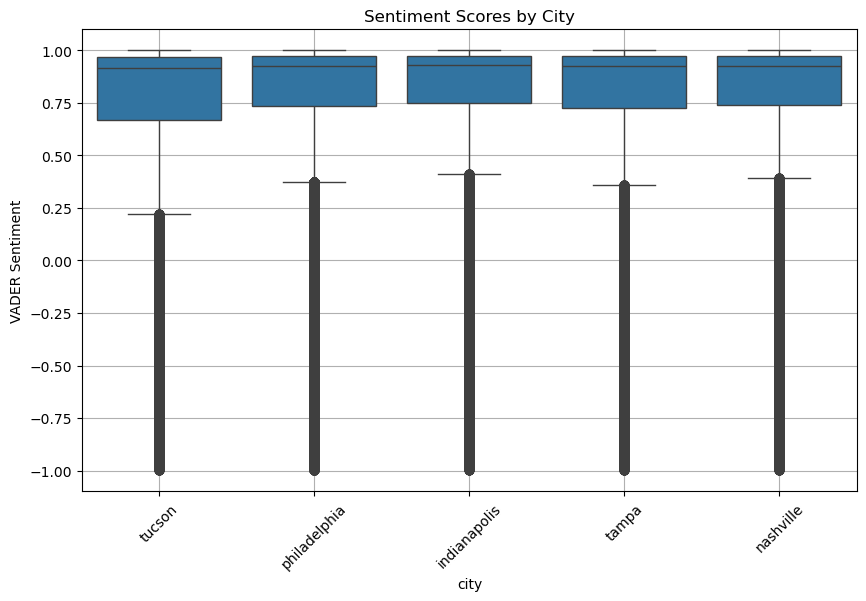

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='city', y='vader_score')
plt.title("Sentiment Scores by City")
plt.xticks(rotation=45)
plt.ylabel("VADER Sentiment")
plt.grid(True)
plt.show()


*TF-IDF Sentiment Classifier*

In [37]:
# Label the data: 1 for positive (>=4 stars), 0 for negative (<=2)
# We'll drop 3-star reviews to keep it binary
df_tfidf = df[df['review_stars'] != 3].copy()
df_tfidf['sentiment_label'] = df_tfidf['review_stars'].apply(lambda x: 1 if x >= 4 else 0)

print("Data shape after filtering:", df_tfidf.shape)
df_tfidf[['review_stars', 'sentiment_label']].value_counts()


Data shape after filtering: (1598245, 26)


review_stars  sentiment_label
5             1                  788765
4             1                  462394
1             0                  197114
2             0                  149972
Name: count, dtype: int64

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform review text
X = tfidf.fit_transform(df_tfidf['review_text'])


In [42]:
from sklearn.model_selection import train_test_split

# Features and labels
y = df_tfidf['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [46]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("TF-IDF Sentiment Classifier Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


TF-IDF Sentiment Classifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     69204
           1       0.97      0.98      0.97    250445

    accuracy                           0.96    319649
   macro avg       0.95      0.93      0.94    319649
weighted avg       0.96      0.96      0.96    319649

Accuracy: 0.9588141993248844


In [48]:
# Predict probability of being positive
df_tfidf['tfidf_score'] = model.predict_proba(tfidf.transform(df_tfidf['review_text']))[:, 1]

# Compare with actual rating or VADER
df_tfidf[['review_stars', 'sentiment_label', 'tfidf_score']].sample(10)


,review_stars,sentiment_label,tfidf_score
1234098,4,1,0.993464
777143,4,1,0.999351
249867,4,1,0.922967
1596128,5,1,0.972020
51740,2,0,0.005927
1029490,4,1,0.999752
1775651,2,0,0.921121
1400216,1,0,0.077690
962252,4,1,0.364571
1216722,4,1,0.998092


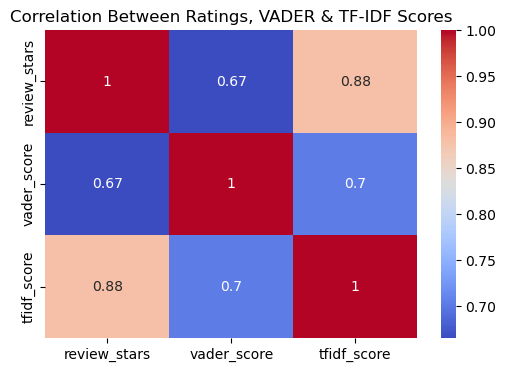

In [50]:
# Make sure we're working with the same sample (filtered 1/0 star labels)
merged_df = df_tfidf[['review_stars', 'vader_score', 'tfidf_score']].copy()

# Drop NaNs just in case
merged_df.dropna(inplace=True)

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Ratings, VADER & TF-IDF Scores")
plt.show()


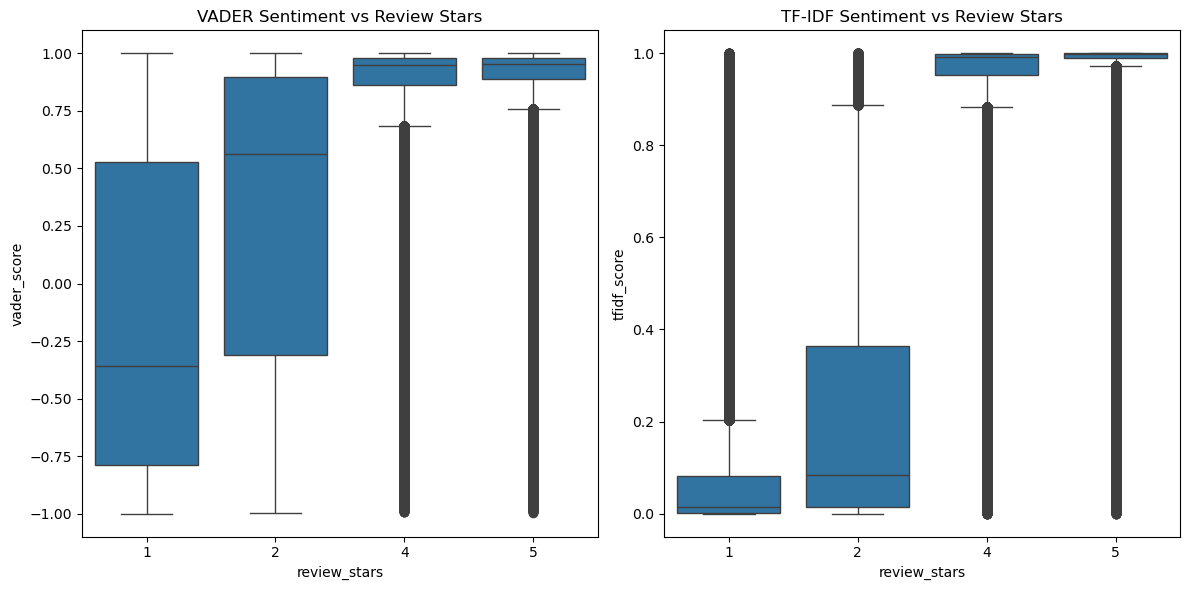

In [52]:
plt.figure(figsize=(12, 6))

# VADER plot
plt.subplot(1, 2, 1)
sns.boxplot(data=merged_df, x='review_stars', y='vader_score')
plt.title("VADER Sentiment vs Review Stars")

# TF-IDF plot
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_df, x='review_stars', y='tfidf_score')
plt.title("TF-IDF Sentiment vs Review Stars")

plt.tight_layout()
plt.show()


**BERT Sentiment Scoring**

In [85]:
!pip install transformers --quiet


In [120]:
from transformers import pipeline

# Load BERT sentiment pipeline
bert_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


Device set to use mps:0


In [121]:
bert_df = df[['review_text', 'review_stars']].dropna().sample(20000, random_state=42).copy()



In [122]:
from transformers import pipeline

bert_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    device=-1  # Force CPU
)


Device set to use cpu


In [123]:
from tqdm.notebook import tqdm  

# Clean up text and predict
bert_scores = []
for text in tqdm(bert_df['review_text'], desc="Running BERT on reviews"):
    try:
        result = bert_pipeline(text[:512])[0]
        score = int(result['label'][0])  # Extract '4 stars' → 4
    except:
        score = None
    bert_scores.append(score)

bert_df['bert_score'] = bert_scores
bert_df.dropna(inplace=True)


Running BERT on reviews:   0%|          | 0/20000 [00:00<?, ?it/s]

In [125]:
print("BERT scoring complete. Here's a preview:")
bert_df[['review_text', 'review_stars', 'bert_score']].head()


BERT scoring complete. Here's a preview:


,review_text,review_stars,bert_score
1743961,I absolutely love Barrio breads! I stood in li...,5,5
1106917,The peking duck here is solid and of course th...,4,4
368380,"Innovative, unique, boundary pushing restauran...",5,5
603409,I have an opinion that unassuming restaurants ...,5,4
760040,"Very close to our hotel, within walking distan...",4,5


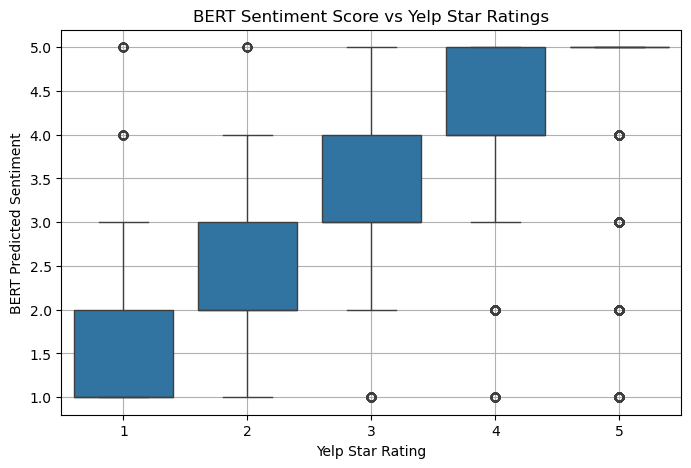

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=bert_df, x='review_stars', y='bert_score')
plt.title("BERT Sentiment Score vs Yelp Star Ratings")
plt.xlabel("Yelp Star Rating")
plt.ylabel("BERT Predicted Sentiment")
plt.grid(True)
plt.show()


In [127]:
correlation = bert_df['review_stars'].corr(bert_df['bert_score'])
print(f"Correlation between BERT sentiment and Yelp stars: {correlation:.4f}")


Correlation between BERT sentiment and Yelp stars: 0.7929


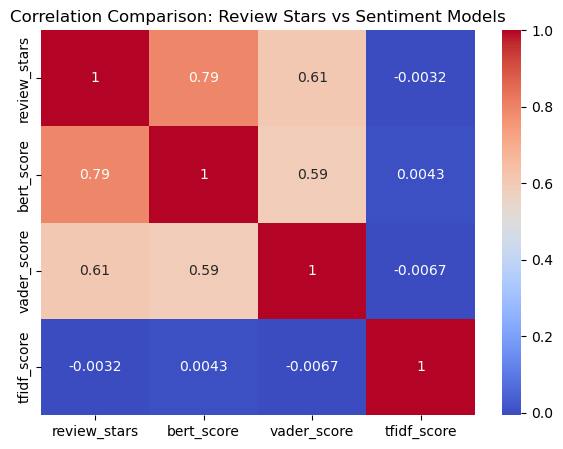

In [129]:
# Sample matching sizes for fair comparison
compare_df = pd.DataFrame({
    'review_stars': bert_df['review_stars'].values,
    'bert_score': bert_df['bert_score'].values,
    'vader_score': df.sample(len(bert_df), random_state=42)['vader_score'].values,
    'tfidf_score': df_tfidf.sample(len(bert_df), random_state=42)['tfidf_score'].values
})

plt.figure(figsize=(7, 5))
sns.heatmap(compare_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Comparison: Review Stars vs Sentiment Models")
plt.show()


In [131]:
# Define positive: score >= 4
bert_df['bert_label'] = bert_df['bert_score'].apply(lambda x: 1 if x >= 4 else 0)

# Evaluate vs star rating label
bert_df['true_label'] = bert_df['review_stars'].apply(lambda x: 1 if x >= 4 else 0 if x <= 2 else None)
bert_eval_df = bert_df.dropna(subset=['true_label'])

from sklearn.metrics import classification_report, accuracy_score
print("BERT Classification Performance:")
print(classification_report(bert_eval_df['true_label'], bert_eval_df['bert_label']))


BERT Classification Performance:
              precision    recall  f1-score   support

         0.0       0.73      0.94      0.82      3807
         1.0       0.98      0.90      0.94     13776

    accuracy                           0.91     17583
   macro avg       0.85      0.92      0.88     17583
weighted avg       0.93      0.91      0.91     17583



In [134]:
# Step 1: Merge BERT-scored reviews with the main dataset to get business_id, name, city
bert_full_df = bert_df.merge(df[['review_text', 'business_id', 'name', 'city']], on='review_text', how='left')

# Step 2: Group by business to calculate average sentiment
top_bert_restaurants = (
    bert_full_df.groupby(['business_id', 'name', 'city'])['bert_score']
    .mean()
    .reset_index()
    .sort_values(by='bert_score', ascending=False)
    .head(10)
)

# Step 3: Display results
print("🔝 Top 10 Restaurants by Avg BERT Sentiment Score:")
top_bert_restaurants


🔝 Top 10 Restaurants by Avg BERT Sentiment Score:


,business_id,name,city,bert_score
4377,bWGFzosyIbhoU-jBMEEHKg,Chef Dan's Southern Comfort Restaurant,indianapolis,5.0
1824,FFHTUPo0QTSIylLCCe27ig,Cucina Maria,philadelphia,5.0
5967,pPMHur7EI9mb139mMhdowA,Boston Market,tampa,5.0
1864,FcZxIZcFyJFDny8J83KzCw,Andorra Ping Pong,philadelphia,5.0
5965,pP2Rm4rJyloEQbddwXyV-Q,Bro's Cajun Cuisine,nashville,5.0
5962,pNf55jk_wLt8KO6yuz70MA,Wawa,philadelphia,5.0
1870,Ff7CVmNORVLNsV3L-lrkvw,OSH Restaurant & Grill,nashville,5.0
5960,pNHHL-Dn5VGFbEwAyXvGoA,Cayman Cove,tampa,5.0
5958,pLAPm1JgHI-we3-NwiwXcA,Mel's Drive-in,indianapolis,5.0
5956,pJch8MuldB4WJtg6gsTU5Q,The Sweet Coquí,tucson,5.0


**Recommendation Sysytem**

In [192]:
bert_full_df = bert_df.merge(df[['review_text', 'business_id', 'name', 'city']], on='review_text', how='left')


In [194]:
restaurant_features = df[['business_id', 'name', 'city', 'categories', 'business_stars']].drop_duplicates()

# Merge BERT scores into restaurant metadata
meta_df = restaurant_features.merge(bert_avg, on='business_id', how='left')

# Optional: Drop rows missing sentiment
meta_df.dropna(subset=['avg_bert_score'], inplace=True)


In [196]:
!pip install scikit-surprise --quiet


In [198]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Prepare ratings
ratings_df = df[['user_id', 'business_id', 'review_stars']].dropna()

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'business_id', 'review_stars']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Train CF model
cf_model = SVD()
cf_model.fit(trainset)


In [200]:
unique_biz_ids = meta_df['business_id'].unique()

cf_predictions = []
dummy_user = 'city_user'  # simulated user ID

for biz_id in unique_biz_ids:
    pred = cf_model.predict(dummy_user, biz_id)
    cf_predictions.append((biz_id, pred.est))

cf_df = pd.DataFrame(cf_predictions, columns=['business_id', 'cf_score'])


In [202]:
# Combine all info into one DataFrame
cf_merged = cf_df.merge(meta_df, on='business_id', how='left')


In [204]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cf_merged['cf_score_scaled'] = scaler.fit_transform(cf_merged[['cf_score']])
cf_merged['bert_score_scaled'] = scaler.fit_transform(cf_merged[['avg_bert_score']])

# Hybrid scoring formula
alpha = 0.7  # Weight for CF
beta = 0.3   # Weight for BERT

cf_merged['hybrid_score'] = alpha * cf_merged['cf_score_scaled'] + beta * cf_merged['bert_score_scaled']


In [208]:
print(meta_df.shape)
print(meta_df['city'].unique())


(7255, 6)
['philadelphia' 'indianapolis' 'tucson' 'tampa' 'nashville']


In [211]:
# 1. Ratings
ratings_df = df[['user_id', 'business_id', 'review_stars']].dropna()
print("Ratings shape:", ratings_df.shape)

# 2. Load Surprise
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df, reader)
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD()
model.fit(trainset)


Ratings shape: (1817429, 3)


In [213]:
unique_biz_ids = meta_df['business_id'].unique()
print("Businesses to predict:", len(unique_biz_ids))

cf_predictions = []

# Predict for a dummy user (works even if this user doesn’t exist)
for biz_id in unique_biz_ids:
    pred = model.predict(uid='city_user', iid=biz_id)
    cf_predictions.append((biz_id, pred.est))

cf_df = pd.DataFrame(cf_predictions, columns=['business_id', 'cf_score'])
print("CF predictions:", cf_df.shape)


Businesses to predict: 7255
CF predictions: (7255, 2)


In [215]:
cf_merged = cf_df.merge(meta_df, on='business_id', how='left')
print("Merged shape:", cf_merged.shape)

# Look at any missing cities?
print(cf_merged['city'].isna().sum())


Merged shape: (7255, 7)
0


In [217]:
print("Available cities in your data:")
print(cf_merged['city'].unique())


Available cities in your data:
['philadelphia' 'indianapolis' 'tucson' 'tampa' 'nashville']


In [221]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cf_merged['cf_score_scaled'] = scaler.fit_transform(cf_merged[['cf_score']])
cf_merged['bert_score_scaled'] = scaler.fit_transform(cf_merged[['avg_bert_score']])

cf_merged['hybrid_score'] = 0.7 * cf_merged['cf_score_scaled'] + 0.3 * cf_merged['bert_score_scaled']


In [227]:
# Check what cities are available
print(cf_merged['city'].unique())

# Pick one and run:
city_name = 'tucson'

top_recs = (
    cf_merged[cf_merged['city'] == city_name]
    .sort_values(by='hybrid_score', ascending=False)
    .drop_duplicates('business_id')
    .head(10)
)

print("Top restaurants in", city_name)
display(top_recs[['name', 'city', 'cf_score', 'avg_bert_score', 'hybrid_score']])


['philadelphia' 'indianapolis' 'tucson' 'tampa' 'nashville']
Top restaurants in tucson


,name,city,cf_score,avg_bert_score,hybrid_score
945,Tumerico,tucson,4.821262,4.833333,0.975129
4366,Prest Coffee Drive Thru,tucson,4.752784,5.000000,0.974058
674,Raptor Canyon Cafe,tucson,4.814250,4.666667,0.961240
6530,Janet & Ray's,tucson,4.632022,5.000000,0.950125
1093,The curry pot - srilankan fusion foodtruck,tucson,4.626001,5.000000,0.948931
5770,NI HAO TEA,tucson,4.613317,5.000000,0.946417
5642,Kiss Of Smoke BBQ,tucson,4.608108,5.000000,0.945385
6464,Bombolé,tucson,4.603175,5.000000,0.944407
5778,La Chaiteria,tucson,4.596434,5.000000,0.943071
6452,The Hidden Grill2go,tucson,4.588858,5.000000,0.941570


In [229]:
print("meta_df:", meta_df.shape)
print("cf_df:", cf_df.shape)
print("cf_merged:", cf_merged.shape)
print("Cities in cf_merged:", cf_merged['city'].unique())
print("City sample:", cf_merged[cf_merged['city'] == 'Tucson'].shape)


meta_df: (7255, 6)
cf_df: (7255, 2)
cf_merged: (7255, 10)
Cities in cf_merged: ['philadelphia' 'indianapolis' 'tucson' 'tampa' 'nashville']
City sample: (0, 10)


In [231]:
for city in cf_merged['city'].unique():
    print(f"\n📍 Top Restaurants in {city}")
    top5 = (
        cf_merged[cf_merged['city'] == city]
        .sort_values(by='hybrid_score', ascending=False)
        .head(5)
    )
    display(top5[['name', 'hybrid_score']])



📍 Top Restaurants in philadelphia


,name,hybrid_score
1135,Antonio's Deli,0.998127
7111,Christie's Deli,0.984698
501,Mom Mom's Kitchen and Polish Food Cart,0.983518
3051,Tortilleria San Roman,0.978003
5752,Batter & Crumbs Vegan Bakery and Cafe,0.974894



📍 Top Restaurants in indianapolis


,name,hybrid_score
450,Phan's Kitchen,0.995788
5604,Garcia's Hot Dog,0.979111
5769,Yannis Golden Gyros,0.976534
5251,Ali'i Poke Indy,0.972689
4489,Fitzgerald's Lunch House,0.971602



📍 Top Restaurants in tucson


,name,hybrid_score
945,Tumerico,0.975129
4366,Prest Coffee Drive Thru,0.974058
674,Raptor Canyon Cafe,0.961240
6530,Janet & Ray's,0.950125
1093,The curry pot - srilankan fusion foodtruck,0.948931



📍 Top Restaurants in tampa


,name,hybrid_score
2664,Yolk White & Associates,0.999133
6869,Pure Kitchen Organic Vegan,0.993861
328,Chicago Paulies,0.987390
3467,Healthy N Fresh Cafe,0.982284
5639,The Mediterranean Chickpea,0.981250



📍 Top Restaurants in nashville


,name,hybrid_score
5565,The Horn,0.987371
2226,Camion chino,0.978263
6463,Red Perch,0.977120
1805,The Café at Thistle Farms,0.975972
4071,Veggie Village,0.972148


**Add More Filters**

In [237]:
# Count number of reviews for each business
review_counts = df.groupby('business_id')['review_id'].count().reset_index()
review_counts.columns = ['business_id', 'review_count']


In [239]:
cf_merged = cf_merged.merge(review_counts, on='business_id', how='left')


In [241]:
cf_merged[['name', 'review_count']].head()


,name,review_count
0,Zaika,190
1,Dmitri's,284
2,Milktooth,1421
3,LaScala's,380
4,BK Tacos,511


In [243]:
# Min Yelp stars
cf_merged_filtered = cf_merged_filtered[cf_merged_filtered['business_stars'] >= 3.5]

# Optional: filter by cuisine
cf_merged_filtered = cf_merged_filtered[
    cf_merged_filtered['categories'].str.contains("Mexican", case=False, na=False)
]


In [248]:
cf_merged_filtered = cf_merged[cf_merged['review_count'] >= 50]


In [250]:
city_name = 'tucson'

top_filtered_recs = (
    cf_merged_filtered[cf_merged_filtered['city'] == city_name]
    .sort_values(by='hybrid_score', ascending=False)
    .drop_duplicates('business_id')
    .head(10)
)

display(top_filtered_recs[['name', 'categories', 'business_stars', 'review_count', 'cf_score', 'avg_bert_score', 'hybrid_score']])


,name,categories,business_stars,review_count,cf_score,avg_bert_score,hybrid_score
945,Tumerico,"Mexican, Gluten-Free, Vegetarian, Restaurants,...",5.0,724,4.821262,4.833333,0.975129
674,Raptor Canyon Cafe,"Cafes, American (Traditional), Breakfast & Bru...",5.0,83,4.814250,4.666667,0.961240
6530,Janet & Ray's,"Soul Food, Caribbean, Restaurants",4.5,63,4.632022,5.000000,0.950125
5770,NI HAO TEA,"Tea Rooms, Restaurants, Vegan, Bubble Tea, Foo...",4.5,200,4.613317,5.000000,0.946417
5642,Kiss Of Smoke BBQ,"Restaurants, Barbeque",4.5,98,4.608108,5.000000,0.945385
6464,Bombolé,"Restaurants, Food, Indian, Empanadas, Honduran",4.5,83,4.603175,5.000000,0.944407
5778,La Chaiteria,"Mexican, Tacos, Vegan, Vegetarian, Food Trucks...",5.0,69,4.596434,5.000000,0.943071
7217,Nate's Italian Kitchen & CheeseSteaks,"Restaurants, Delis, Italian, Salad, Sandwiches",4.5,62,4.584416,5.000000,0.940690
6812,Barrio Bread,"Food, Specialty Food, Bakeries, Restaurants",5.0,230,4.857495,4.250000,0.938560
234,Indian Frybread-Manna From Heaven,"Restaurants, Mexican, American (Traditional), ...",4.5,90,4.681874,4.666667,0.935004


In [252]:
def get_top_restaurants(
    city: str,
    cuisine_keyword: str = None,
    min_stars: float = 3.5,
    min_reviews: int = 50,
    top_n: int = 10
):
    # Start with full merged set
    filtered = cf_merged.copy()
    
    # Apply filters
    filtered = filtered[
        (filtered['city'].str.lower() == city.lower()) &
        (filtered['business_stars'] >= min_stars) &
        (filtered['review_count'] >= min_reviews)
    ]

    if cuisine_keyword:
        filtered = filtered[
            filtered['categories'].str.contains(cuisine_keyword, case=False, na=False)
        ]

    # Sort by hybrid score
    top_recs = (
        filtered
        .sort_values(by='hybrid_score', ascending=False)
        .drop_duplicates('business_id')
        .head(top_n)
    )

    return top_recs[['name', 'categories', 'business_stars', 'review_count', 'avg_bert_score', 'cf_score', 'hybrid_score']]


In [254]:
get_top_restaurants(city="tucson", cuisine_keyword="Mexican", min_stars=4.0, min_reviews=100)


,name,categories,business_stars,review_count,avg_bert_score,cf_score,hybrid_score
945,Tumerico,"Mexican, Gluten-Free, Vegetarian, Restaurants,...",5.0,724,4.833333,4.821262,0.975129
5721,The Blacktop Grill,"Hot Dogs, Food Stands, Nightlife, Mexican, Foo...",5.0,100,4.500000,4.716399,0.929347
6191,Tacos Apson,"Restaurants, Mexican",4.5,248,5.000000,4.426718,0.909436
2377,The Quesadillas,"Tacos, Restaurants, Mexican",4.5,517,4.222222,4.675328,0.900374
6539,The Little One,"Restaurants, Mexican, Breakfast & Brunch, Lati...",4.5,365,4.500000,4.569381,0.900210
277,Aqui Con El Nene,"Fast Food, Restaurants, Mexican, Food Stands, ...",4.5,335,4.600000,4.499555,0.893871
1125,Taqueria Juanito's,"Mexican, Restaurants",4.5,390,4.800000,4.408632,0.890851
4705,Sunny Daze Cafe,"Diners, Tex-Mex, Cafes, Breakfast & Brunch, Re...",4.5,421,5.000000,4.292705,0.882876
2513,Anita Street Market,"Food, Grocery, Restaurants, Mexican",4.5,189,5.000000,4.292119,0.882760
1980,Salsa Verde Restaurant,"Restaurants, Mexican",4.5,342,4.285714,4.491988,0.868800


In [256]:
pip install streamlit pandas scikit-learn scikit-surprise


Note: you may need to restart the kernel to use updated packages.


In [258]:
cf_merged.to_csv("cf_merged_final.csv", index=False)
